### Student Information
Name:吳花瑜

Student ID:114065534

GitHub ID:huayu1115

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [4]:
### import
import pandas as pd
import numpy as np
import plotly as py
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh

In [5]:
### 導入資料集
df = pd.read_csv('newdataset\Reddit-stock-sentiment.csv')
### 嘗試印出
print(df.iloc[0:2, 0:4])

      type             datetime  post_id       subreddit
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets


In [6]:
print(len(df))

847


In [7]:
### 列出所有欄位名稱
print(df.columns.tolist())

['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']


### **>>> Exercise 1:**  


In [8]:
### print out the *text* data for the first three samples in the dataset
for i in range(3):
    print(f'example {i+1}')
    print(df.text[i])

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


### **>>> Exercise 2:**  


In [9]:
### Experiment with other querying techniques
df[:16:3][['title','author','type']]

,title,author,type
0,Retardation is on the menu boys! WSB is so back,StickyTip420,comment
3,Who knows more? $VMAR,emiljenfn,post
6,Is the market in complete denial right now?,stoniey84,comment
9,Any cheap stocks under $10?,Zumuru,comment
12,U.S. 10-year Treasury yields rise as Trump tar...,JBallMan23,comment
15,"It's fucking awful seeing the ""Silver"" misinfo...",nerokaeclone,comment


### **>>> Exercise 3:**  


In [10]:
### fetch records (type == post), and query every 10th record. Only show the first 5 records.
df[df['type'] == 'post'][::10][:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
165,post,2025-04-09 14:01:01,1jv6i3y,stockstobuytoday,Established Uptrend,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Stock list generated from technical Analysis. ...,0.10000,0.000000,0.0,"['SMA', 'ta_rsi_nob60', 'ft=2', 'stockbuyvest....",0.0
332,post,2025-04-11 18:25:25,1jwwv42,wallstreetbets,$75k+ In Gains (300% YTD),KatBoss01,https://www.reddit.com/gallery/1jwwv42,5,0.0,1.00,"Mostly in MSTR calls, AAPL puts and GBTC long.",0.45000,0.225000,1.0,"['GBTC', 'MSTR', 'AAPL']",1.0
421,post,2025-03-31 14:05:30,1jo3zpc,stockstobuytoday,Stock Gainers for Today,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Stocks that are trending up today\r\n\r\n [Pop...,0.00000,0.000000,0.0,"[']', 'Popping', 'stockbuyvest.com', 'today']",0.0
487,post,2021-12-25 0:40:59,rnypxo,stockstobuytoday,Deep value vs Dividend!,AnonymusFarmer,https://www.reddit.com/r/stockstobuytoday/comm...,9,0.0,0.91,"Good Morning Investors, \r\n\r\nI am a young F...",0.41903,0.119152,1.0,"['student', 'someone', 'x200B', 'dividend', 'w...",0.0


### **>>> Exercise 4:**  


In [11]:
### calculate the missing values in every record instead of every column
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

### **>>> Exercise 5:**  explain why `.isnull()` didn't work (can skip)


### **>>> Exercise 6:**  


In [12]:
### Sampling
df_sample = df.sample(n=500)
df_sample.sort_index()[:3]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.00000,-0.900000,-1.0,[],-1.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.00000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0


### **>>> Exercise 7:**  


label
 0.0    247
-1.0    192
 1.0     61
Name: count, dtype: int64


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

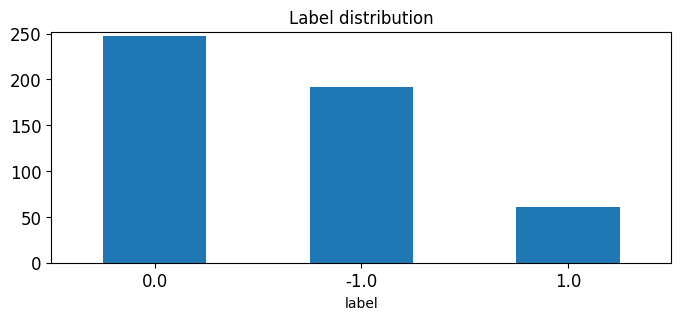

In [13]:
### visualize
print(df_sample.label.value_counts())

df_sample.label.value_counts().plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, df_sample.label.value_counts().max()+5], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### **>>> Exercise 8:**  


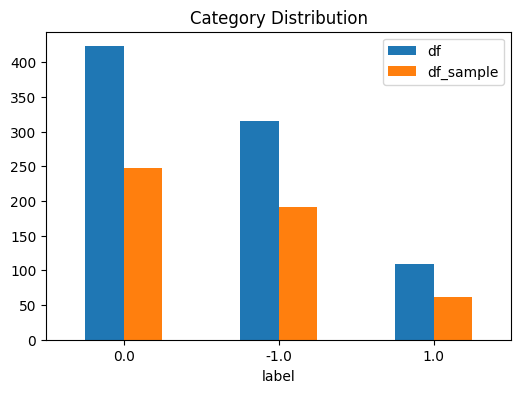

In [14]:
# 分別計算數量
df_counts = df['label'].value_counts()
df_sample_counts = df_sample['label'].value_counts()

# 利用 union 合併兩個集合，若有沒有的類別則補 0
categories = sorted(set(df_counts.index).union(set(df_sample_counts.index)))
df_counts = df_counts.reindex(categories, fill_value=0)
df_sample_counts = df_sample_counts.reindex(categories, fill_value=0)

# 轉換成 DataFrame
compare = pd.DataFrame({
    'df': df_counts,
    'df_sample': df_sample_counts
})

# 加總 df 和 df_sample 中的數量，並以總和排序
compare['total'] = compare['df'] + compare['df_sample']
compare = compare.sort_values(by='total', ascending=False)

# 只畫出 df 和 df_sample 不畫出 total
compare[['df', 'df_sample']].plot(kind='bar',
                                figsize=(6, 4),
                                rot=0,
                                title='Category Distribution')

plt.show()

### **>>> Exercise 9:**  


In [31]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) 
# document1 的計算結果
print(">>第一筆資料的 text 是: ", df.loc[0,'text'])
print(">>fit transform 結果是:")
print(df_counts[0])
print(">>對應的字是:")
print("\b", count_vect.get_feature_names_out()[692])
print("\b", count_vect.get_feature_names_out()[2706])
print("\b", count_vect.get_feature_names_out()[3248])

>>第一筆資料的 text 是:  Calls on retards
>>fit transform 結果是:
  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1
>>對應的字是:
 calls
 on
 retards


In [32]:
analyze = count_vect.build_analyzer()
analyze(df.text[0])

['calls', 'on', 'retards']

### **>>> Exercise 10:**  


In [17]:
# 第四筆資料有多個非零值，找出它們
df_counts[0:4, 130:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0]])

In [29]:
arr = df_counts[3, 130:200].toarray()  # index start from 130
row_idx, col_idx = np.where(arr >= 1)
print("nonzero index: ", col_idx)

for i in col_idx:
    print(count_vect.get_feature_names_out()[i+130]) # we need to add 130 

nonzero index:  [45 65 66 67]
about
achieved
achievement
achieves


# Phase 2

In [ ]:
### Begin Assignment Here